In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Project Line Chart after DataSet cleaning

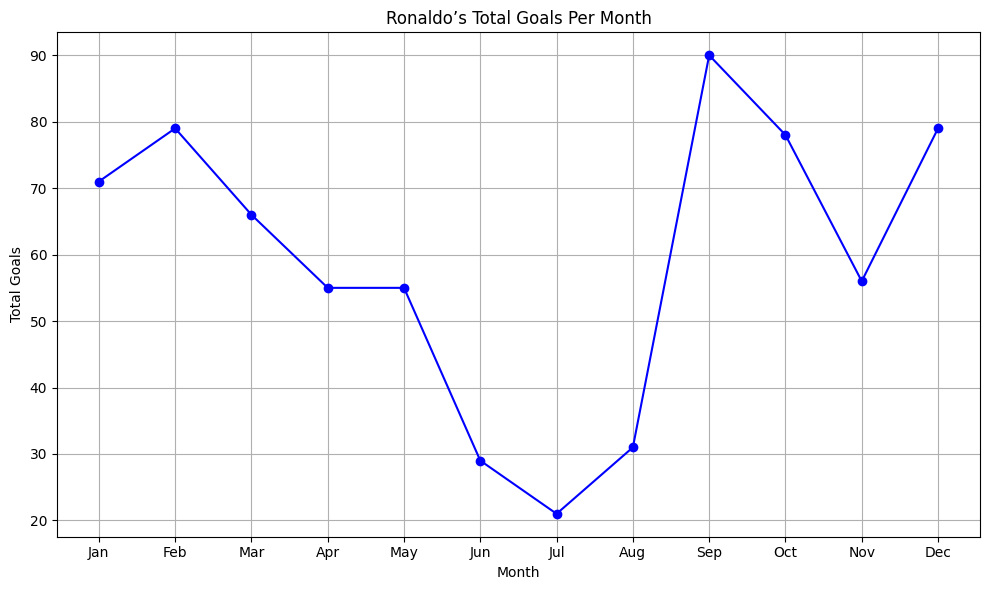

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
file_path = '/kaggle/input/ronaldos-dataset-my-projerct/data.xlsx'
df = pd.read_excel(file_path, sheet_name='data')
 
# Data Cleaning
 
# Convert 'Season' and 'Date' to datetime
df['Season'] = pd.to_datetime(df['Season'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
 
# Drop rows with missing 'Date' values as they're essential for time series analysis
df_cleaned = df.dropna(subset=['Date'])
 
# Instead of using inplace=True, use loc to avoid chained assignment warnings
df_cleaned.loc[:, 'Playing_Position'] = df_cleaned['Playing_Position'].fillna('Unknown')
df_cleaned.loc[:, 'Minute'] = df_cleaned['Minute'].fillna(0)
 
# Convert 'Minute' to a numerical value, handling cases like '90+5'
def convert_minute(minute):
   if isinstance(minute, str) and '+' in minute:
       base, extra = minute.split('+')
       return int(base) + int(extra)
   elif isinstance(minute, (int, float)):
       return minute
   else:
       try:
           return int(minute)
       except ValueError:
           return 0
 
# Apply the conversion function to the 'Minute' column
df_cleaned['Minute'] = df_cleaned['Minute'].apply(convert_minute)
 
# Add a 'Goal' column with the value 1 to represent each goal
ronaldo_goals = df_cleaned[['Date', 'Minute']].copy()
ronaldo_goals['Goal'] = 1
 
# Extract the month from the 'Date' column (just the month name for easier plotting)
ronaldo_goals['Month'] = ronaldo_goals['Date'].dt.strftime('%b')
 
# Group by month (January to December) across all years and sum the goals
goals_per_month = ronaldo_goals.groupby('Month')['Goal'].sum().reindex(
   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
).reset_index()
 
# Now plotting the total goals per month across all years
plt.figure(figsize=(10, 6))
plt.plot(goals_per_month['Month'], goals_per_month['Goal'], marker='o', linestyle='-', color='blue')
plt.title('Ronaldo’s Total Goals Per Month')
plt.xlabel('Month')
plt.ylabel('Total Goals')
plt.grid(True)
plt.tight_layout()
 
# Show plot
plt.show()
 